# IMPORT LIBRARIES AND DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk # Natural Language tool kit 
nltk.download('stopwords')
from nltk.corpus import stopwords
import pickle



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Load the data
df = pd.read_csv('array.csv', sep=";",names=["Comentario","ForoMachista","ComentarioOdio","ComentarioMachista"])

In [ ]:
df

,Comentario,ForoMachista,ComentarioOdio,ComentarioMachista
0,"-Gordo-Calvo-Menos de 1.70 Para mí y de largo,...",1,1,0.0
1,Bajo > calvo > gordo,1,1,0.0
2,"Bajo, ya que calvo se arregla con peluca o inj...",1,1,0.0
3,Bajito. Ser gordo puedes remediarlo y ser calv...,1,1,0.0
4,depende pero las 3 te merman,1,0,0.0
...,...,...,...,...
906,Y que tiene q ver el dinero con cuidarse? No e...,0,0,0.0
907,"Tampoco lo veo tan mal, ponle un traje y bien ...",0,0,0.0
908,"Willy Toledo, 51.",0,0,0.0
909,Cómo rabian los esclavos del gimnasio y los so...,0,0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Comentario          911 non-null    object 
 1   ForoMachista        911 non-null    object 
 2   ComentarioOdio      911 non-null    object 
 3   ComentarioMachista  910 non-null    float64
dtypes: float64(1), object(3)
memory usage: 28.6+ KB


In [ ]:
df.describe()

,ComentarioMachista
count,910.000000
mean,0.070330
std,0.255842
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df['Comentario']

0      -Gordo-Calvo-Menos de 1.70 Para mí y de largo,...
1                                   Bajo > calvo > gordo
2      Bajo, ya que calvo se arregla con peluca o inj...
3      Bajito. Ser gordo puedes remediarlo y ser calv...
4                           depende pero las 3 te merman
                             ...                        
906    Y que tiene q ver el dinero con cuidarse? No e...
907    Tampoco lo veo tan mal, ponle un traje y bien ...
908                                    Willy Toledo, 51.
909    Cómo rabian los esclavos del gimnasio y los so...
910                      Arriba arriba, molte preocupate
Name: Comentario, Length: 911, dtype: object

# PERFORM DATA EXPLORATION 

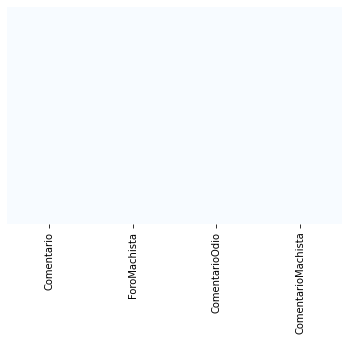

In [ ]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4a37fba50>]],
      dtype=object)

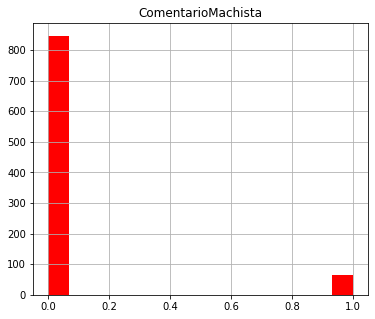

In [ ]:
df.hist(bins = 15, figsize = (6,5), color = 'r', range=(0,1))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


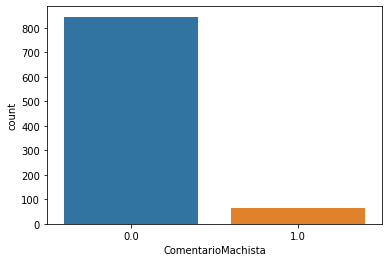

In [ ]:
sns.countplot(df['ComentarioMachista'], label = "Count") 

In [ ]:
# Let's get the length of the messages
df['length'] = df['Comentario'].apply(len)

In [ ]:
df

,Comentario,ForoMachista,ComentarioOdio,ComentarioMachista,length
0,"-Gordo-Calvo-Menos de 1.70 Para mí y de largo,...",1,1,0.0,224
1,Bajo > calvo > gordo,1,1,0.0,20
2,"Bajo, ya que calvo se arregla con peluca o inj...",1,1,0.0,76
3,Bajito. Ser gordo puedes remediarlo y ser calv...,1,1,0.0,56
4,depende pero las 3 te merman,1,0,0.0,28
...,...,...,...,...,...
906,Y que tiene q ver el dinero con cuidarse? No e...,0,0,0.0,53
907,"Tampoco lo veo tan mal, ponle un traje y bien ...",0,0,0.0,128
908,"Willy Toledo, 51.",0,0,0.0,17
909,Cómo rabian los esclavos del gimnasio y los so...,0,0,0.0,59


In [ ]:
df.describe()

,ComentarioMachista,length
count,910.000000,911.000000
mean,0.070330,174.362239
std,0.255842,304.862470
min,0.000000,2.000000
25%,0.000000,41.000000
50%,0.000000,85.000000
75%,0.000000,190.000000
max,1.000000,3993.000000


In [ ]:
# Let's see the shortest message 
df[df['length'] == 2]['Comentario'].iloc[0]

'si'

In [ ]:
# Let's view the message with mean length 
df[df['length'] == 176]['Comentario'].iloc[0]

'Opino igual exceptuando el alégrate, sin eso habría sido perfecto. Nadie jamás se alegrará de la muerte de un ser querido o conocido, haya cumplido su misión o tuviera 95 años.'

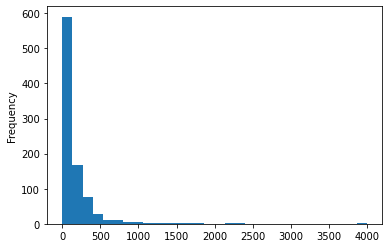

In [ ]:
# Plot the histogram of the length column
df['length'].plot(bins=30, kind='hist') 

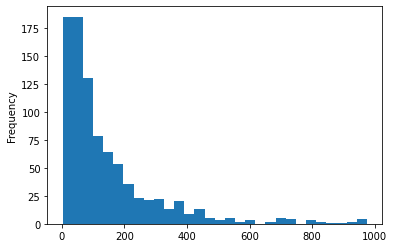

In [ ]:
df[df['length']<1000]['length'].plot(bins=30, kind='hist') 

# PLOT THE WORDCLOUD

In [ ]:
positive = df[df['ComentarioMachista']==0]
positive

,Comentario,ForoMachista,ComentarioOdio,ComentarioMachista,length
0,"-Gordo-Calvo-Menos de 1.70 Para mí y de largo,...",1,1,0.0,224
1,Bajo > calvo > gordo,1,1,0.0,20
2,"Bajo, ya que calvo se arregla con peluca o inj...",1,1,0.0,76
3,Bajito. Ser gordo puedes remediarlo y ser calv...,1,1,0.0,56
4,depende pero las 3 te merman,1,0,0.0,28
...,...,...,...,...,...
906,Y que tiene q ver el dinero con cuidarse? No e...,0,0,0.0,53
907,"Tampoco lo veo tan mal, ponle un traje y bien ...",0,0,0.0,128
908,"Willy Toledo, 51.",0,0,0.0,17
909,Cómo rabian los esclavos del gimnasio y los so...,0,0,0.0,59


In [ ]:
negative = df[df['ComentarioMachista']==1]
negative

,Comentario,ForoMachista,ComentarioOdio,ComentarioMachista,length
47,"follarse a tu novia, cornudo",1,1,1.0,28
57,Yo es que me he hecho adicto a cuidar mi image...,1,1,1.0,294
70,A mí eso me lo dijo una tía porque le dije que...,1,1,1.0,161
81,"Raritos, raritos, raritos.",1,1,1.0,26
82,Son raros. Nadie los quiere ni los aguanta,1,1,1.0,42
...,...,...,...,...,...
321,Vaya destrozo de cuerpo... Hasta las uñas dan ...,1,1,1.0,110
323,Melafo a tope pero tiene la pinta de no ser mu...,1,1,1.0,68
325,"Con desprecio, pero sí.",1,1,1.0,23
328,Sí y sería la follada más larga que ella haya ...,1,1,1.0,141


In [ ]:
sentences = df['Comentario'].tolist()
len(sentences)

911

In [ ]:
sentences_as_one_string =" ".join(sentences)

In [ ]:
sentences_as_one_string

"-Gordo-Calvo-Menos de 1.70 Para mí y de largo, los bajitos. Es escuchar las conversaciones de amigas diciendo es guapo pero es que es bajito jijiji ai pobre que monooo y darte cuenta que para ellas es un hándicap insalvable. Bajo > calvo > gordo Bajo, ya que calvo se arregla con peluca o injerto, y gordo dieta + gimnasio Bajito. Ser gordo puedes remediarlo y ser calvo tambien. depende pero las 3 te merman calvo tiene solución (turquía).Gordo también (gym).Bajito.. a menos que estés haciendo engañadas constantemente con plantillas en los zapatos para ganar un par de cm los cuales van a dar igual porque eres bajito, cagaste. A Turquía con dieta y con alzas + billeticosArreglado Ser bajito es insalvable, puedes tener la cara y el pelo de Brad Pitt que con menos de 1.70 alguna te echara un polvo pero nunca te tomará en serio. Hombre cardos seguro que sí. Gordo La peor es gordo, sin duda.Los calvos ligan y los bajos también si en lo demás son normales. Los gordos nada. Si eres bajo y acomp

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('spanish')]
    return Test_punc_removed_join_clean

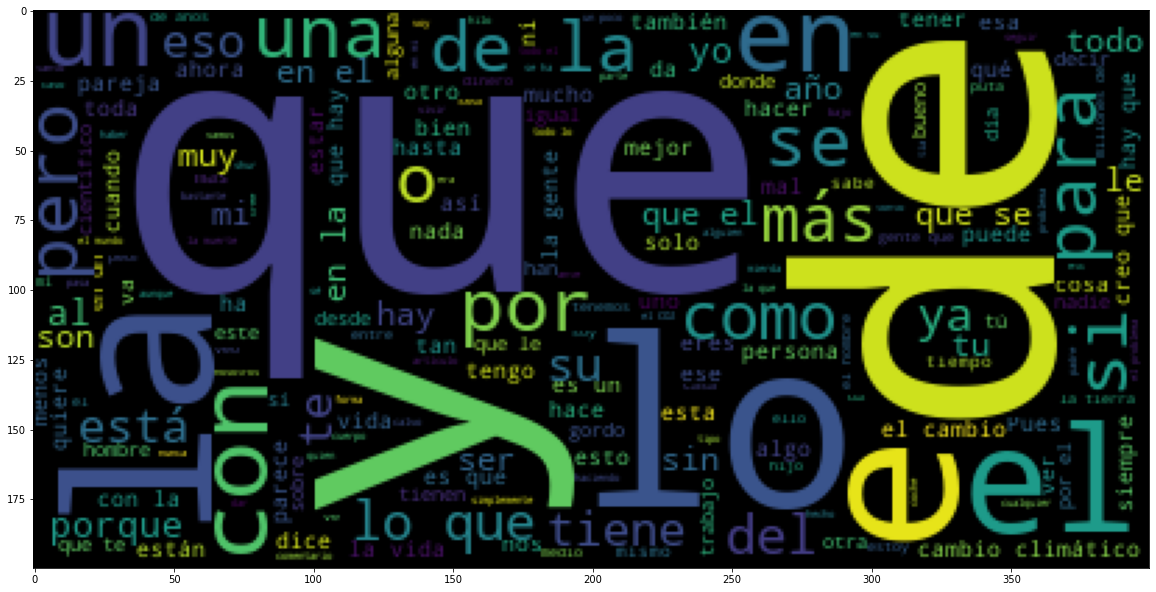

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

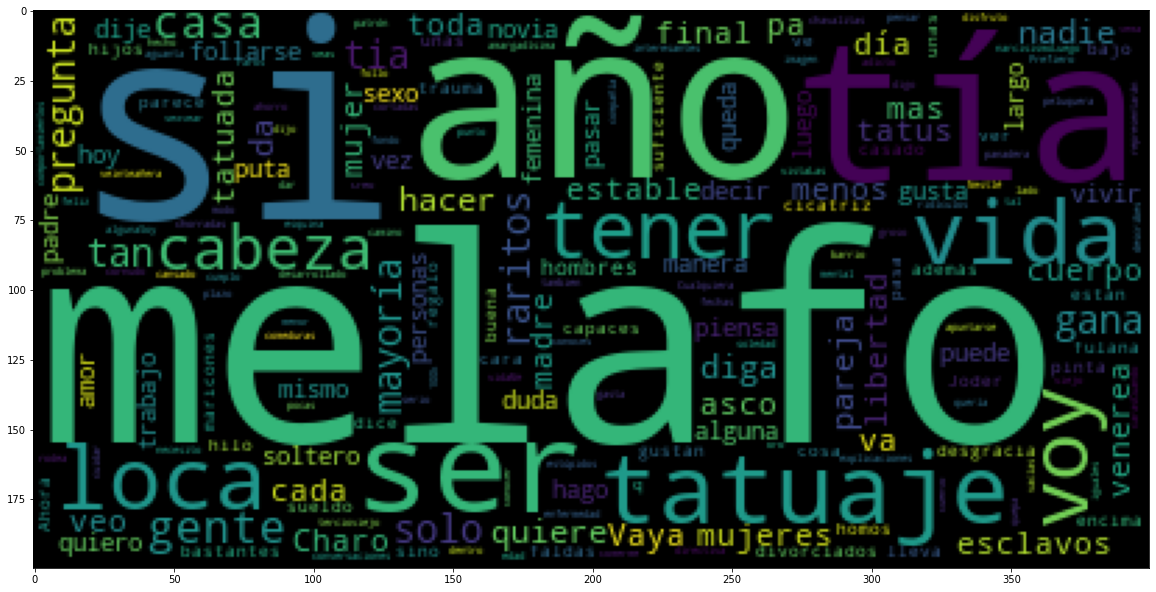

In [ ]:
negative_list = negative['Comentario'].apply(message_cleaning).tolist()
negative_list
negative_sentences_as_one_string = " ".join([item for sublist in negative_list for item in sublist])
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

#  PERFORM DATA CLEANING - REMOVE PUNCTUATION FROM TEXT

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# PERFORM DATA CLEANING - REMOVE STOPWORDS

In [ ]:
import nltk # Natural Language tool kit 
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

# CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [ ]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords
import unicodedata

def message_cleaning(message):
    a,b = 'áéíóúü','aeiouu'
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [unicodedata.normalize("NFKD", word.lower()).encode("ascii","ignore").decode("ascii") for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('spanish')]
    return Test_punc_removed_join_clean

In [ ]:
# Let's test the newly added function
df_clean = df['Comentario'].apply(message_cleaning)

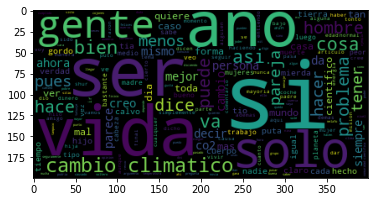

In [ ]:
negative_sentencess_as_one_string = " ".join( [item for sublist in df_clean.to_list() for item in sublist])
plt.imshow(WordCloud().generate(negative_sentencess_as_one_string))

In [ ]:
print(df_clean[5]) # show the cleaned up version

['calvo', 'solucion', 'turquiagordo', 'gymbajito', 'menos', 'haciendo', 'enganadas', 'constantemente', 'plantillas', 'zapatos', 'ganar', 'par', 'cm', 'cuales', 'van', 'dar', 'igual', 'bajito', 'cagaste']


In [ ]:
print(df['Comentario'][5]) # show the original version

calvo tiene solución (turquía).Gordo también (gym).Bajito.. a menos que estés haciendo engañadas constantemente con plantillas en los zapatos para ganar un par de cm los cuales van a dar igual porque eres bajito, cagaste.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(df['Comentario'])

In [ ]:
print(vectorizer.get_feature_names())


['', '0', '007', '1', '10', '100', '1000', '10000', '1000000', '1000aunque', '100k', '100tifiko', '1010', '11a', '12', '123', '1231', '14', '15', '150', '150000', '16', '17', '170', '17explicit', '18', '1825', '185', '1859', '19', '190m', '191', '1925', '192explicit', '1930', '1970', '1974', '1990', '1997', '1asi', '1o', '2', '20', '200', '2000', '2003', '2007', '200anos', '2010', '2018', '2022', '20h', '210', '21045implicit', '220', '23', '235', '2400', '247', '24hel', '25', '250000', '26explicit', '27', '27c', '28', '2800', '288', '29', '3', '30', '3000', '3035', '304045', '31', '32', '35', '350', '36', '39', '3d', '3k', '4', '40', '41', '413', '42', '43', '45', '46', '460', '47', '474k', '5', '50', '51', '510006', '55', '567y', '58', '6', '60', '6000', '61', '65', '70', '7000', '745823', '75', '7o', '8', '80', '8000', '84k', '85', '90', '95', '97', '98', '99', '9999999999999', 'a', 'abajo', 'abajosi', 'abanico', 'abdominales', 'abierta', 'abierto', 'abiertos', 'ablanda', 'abrazos', 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(tweets_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
tweets_countvectorizer.shape

(911, 5431)

In [ ]:
X = pd.DataFrame(tweets_countvectorizer.toarray())


In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,5421,5422,5423,5424,5425,5426,5427,5428,5429,5430
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
909,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df['ComentarioMachista']

In [ ]:
X.shape

(911, 5431)

In [ ]:
y.shape

(911,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(np.nan_to_num(X_train), y_train)


MultinomialNB()

![image.png](attachment:image.png)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

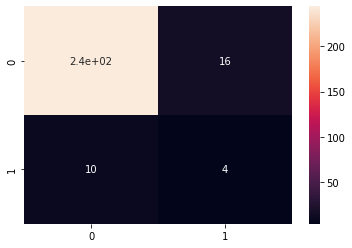

In [ ]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       260
         1.0       0.20      0.29      0.24        14

    accuracy                           0.91       274
   macro avg       0.58      0.61      0.59       274
weighted avg       0.92      0.91      0.91       274



In [ ]:
filename = 'deteccion.sav'
pickle.dump(NB_classifier, open(filename, 'wb'))

In [ ]:
X_test[0:10]

,0,1,2,3,4,5,6,7,8,9,...,5421,5422,5423,5424,5425,5426,5427,5428,5429,5430
876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
467,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_test[y_test==1]

213    1.0
169    1.0
263    1.0
47     1.0
136    1.0
202    1.0
328    1.0
259    1.0
250    1.0
204    1.0
268    1.0
245    1.0
138    1.0
128    1.0
Name: ComentarioMachista, dtype: float64

In [ ]:
NB_classifier.predict(X_test[X_test.index.isin([876,19,892,213,169,263])])

array([0., 0., 0., 1., 0., 0.])